---

## **Plotando Mapa de Relevo**

---

**OBJETIVO:** Aprender a plotar mapa de relevo.

---

**DADOS DE ENTRADA:** São utilizados dados de relevo produzido pelo Shuttle Radar Topography Mission (SRTM) com resolução espacial de 1km denominado [SRTM30+ Global 1-km Digital Elevation Model (DEM): Version 11: Land Surface](https://catalog.data.gov/dataset/srtm30-global-1-km-digital-elevation-model-dem-version-11-land-surface).

---

**DADOS DE SAÍDA:** Figura
- **Tipo do dado:** Figura
- **Formato do dado:** arquivo PNG
- **Imagens geradas:**
    1. script_06_Fig_1_mapa_relevo_brasil.png
    2. script_06_Fig_2_mapa_relevo_MG.png
    3. script_06_Fig_3_mapa_relevo_itajuba.png

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:

1.   **Instalação** das bibliotecas
2.   **Importação** das biblotecas
3.   Montagem do **drive online**
4.   Define caminho do drive
5.   Declaração de funções
6.   Plota relevo do Brasil
7.   Plota relevo de MG
8.   Plota relevo de Itajubá


---

**OBSERVAÇÕES IMPORTANTES**:
1. Código criado para ser processado no Google Colab
2. Mudar o caminho para o do seu drive.

---

- **Realizado por:** Enrique V. Mattos - 30/03/2024
- **Atualizado por:** Enrique V. Mattos - 31/03/2024


# **1° Passo:** Instalando as bibliotecas

In [1]:
# Instalando matplotlib, proplot e numpy
!pip install -q matplotlib==3.4.3
!pip install -q proplot==0.9.7
!pip install -q numpy==1.24.3

# Instalando salem
!pip install -q salem==0.3.9

# Instalando Xarray e suas dependências: https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
!pip install -q xarray dask netCDF4 bottleneck

# Instalando rasterio, pyproj e geopandas
!pip install -q rasterio pyproj geopandas

# Instalando cartopy
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy

Found existing installation: shapely 2.0.3
Uninstalling shapely-2.0.3:
  Successfully uninstalled shapely-2.0.3


- Chegando aqui, será necessário fazer a `Reinicialização do Ambiente de Execução`. Para isto, você deverá acessar `Ambiente de execução`, localizado na barra de ferramentas e clicar em `Reiniciar Sessão`. Como indicado na imagem abaixo.

- Em seguida você deverá rodar novamente a célula anterior de instalações, de forma que as bibliotecas sejam instaladas novamente.

- Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab. Então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual da disciplina.

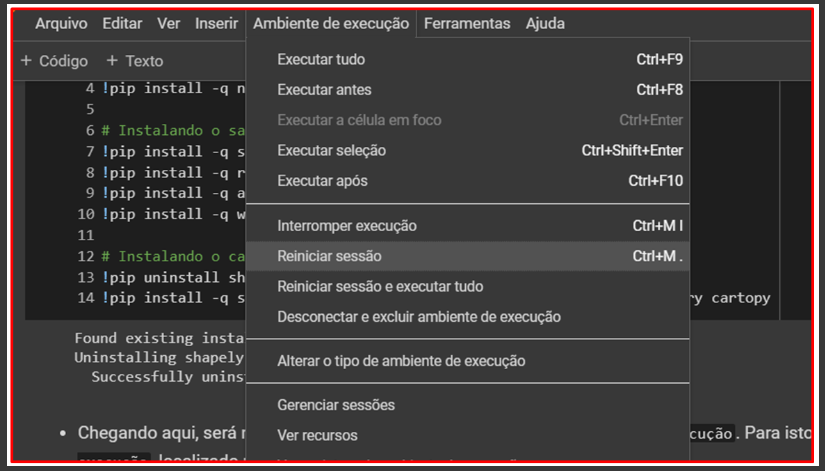

# **2° Passo:** Importando bibliotecas

In [6]:
import numpy as np                          # Biblioteca para trabalhar com matrizes
import proplot as pplt                      # Biblioteca para gerar figuras
import cartopy.crs as ccrs                  # Biblioteca para trabalhar com projeções de mapas
import cartopy.io.shapereader as shpreader  # Biblioteca para ler arquivos shapefiles
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import salem
import time

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

# **3° Passo:** Montando Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4° Passo:** Caminho do diretório

In [8]:
# nome do diretório
dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/2_RELEVO/'

In [9]:
# cria a pasta de saídade com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **5° Passo:** Declarando funções

In [10]:
#-----------------------------------------------------------------------------------
# Função que plota as siglas
#-----------------------------------------------------------------------------------
def plot_siglas_statesb():

    color = 'gray'

    ax.annotate('RS', xy=(-54.0, -29.0),fontsize=15, color=color)
    ax.annotate('SC', xy=(-51.2, -27.5), fontsize=15, color=color)
    ax.annotate('PR', xy=(-52.0, -25.0), fontsize=15, color=color)
    ax.annotate('SP', xy=(-49.0, -22.5), fontsize=15, color=color)
    ax.annotate('MG', xy=(-45, -19.0), fontsize=15, color=color)
    ax.annotate('MS', xy=(-54.0, -21.0), fontsize=15, color=color)
    ax.annotate('Oceano Atlântico', xy=(-47.3, -26.0), fontsize=15, color=color)

#**PARTE 1:** Plota figura de relevo: `Brasil`

In [ ]:
# leitura do arquivo
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url)

# mostra os dados lidos
ds

<xarray.Dataset>
Dimensions:  (lat: 21600, lon: 43200)
Coordinates:
  * lat      (lat) float64 -90.0 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99 90.0
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    elev     (lat, lon) float32 ...
Attributes: (12/67)
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              srtm30plus_v11_land
    naming_authority:                org.pacioos
    metadata_link:                   http://pacioos.org/metadata/srtm30plus_v...
    ISO_Topic_Categories:            elevation
    title:                           SRTM30+ Global 1-km Digital Elevation Mo...
    ...                              ...
    publisher_type:                  institution
    license:                         David T. Sandwell, Walter H. F. Smith, a...
    acknowledgement:                 The Pacific Islands Ocean Observing Syst...
    cdm_data_type:                   Grid
    source:                          USGS SRTM30 DEM, USGS GTOPO30 DEM
    references:                      http://pacioos.org/metadata/world_srtm30...

CPU times: user 6min 37s, sys: 6.28 s, total: 6min 43s
Wall time: 13min 17s


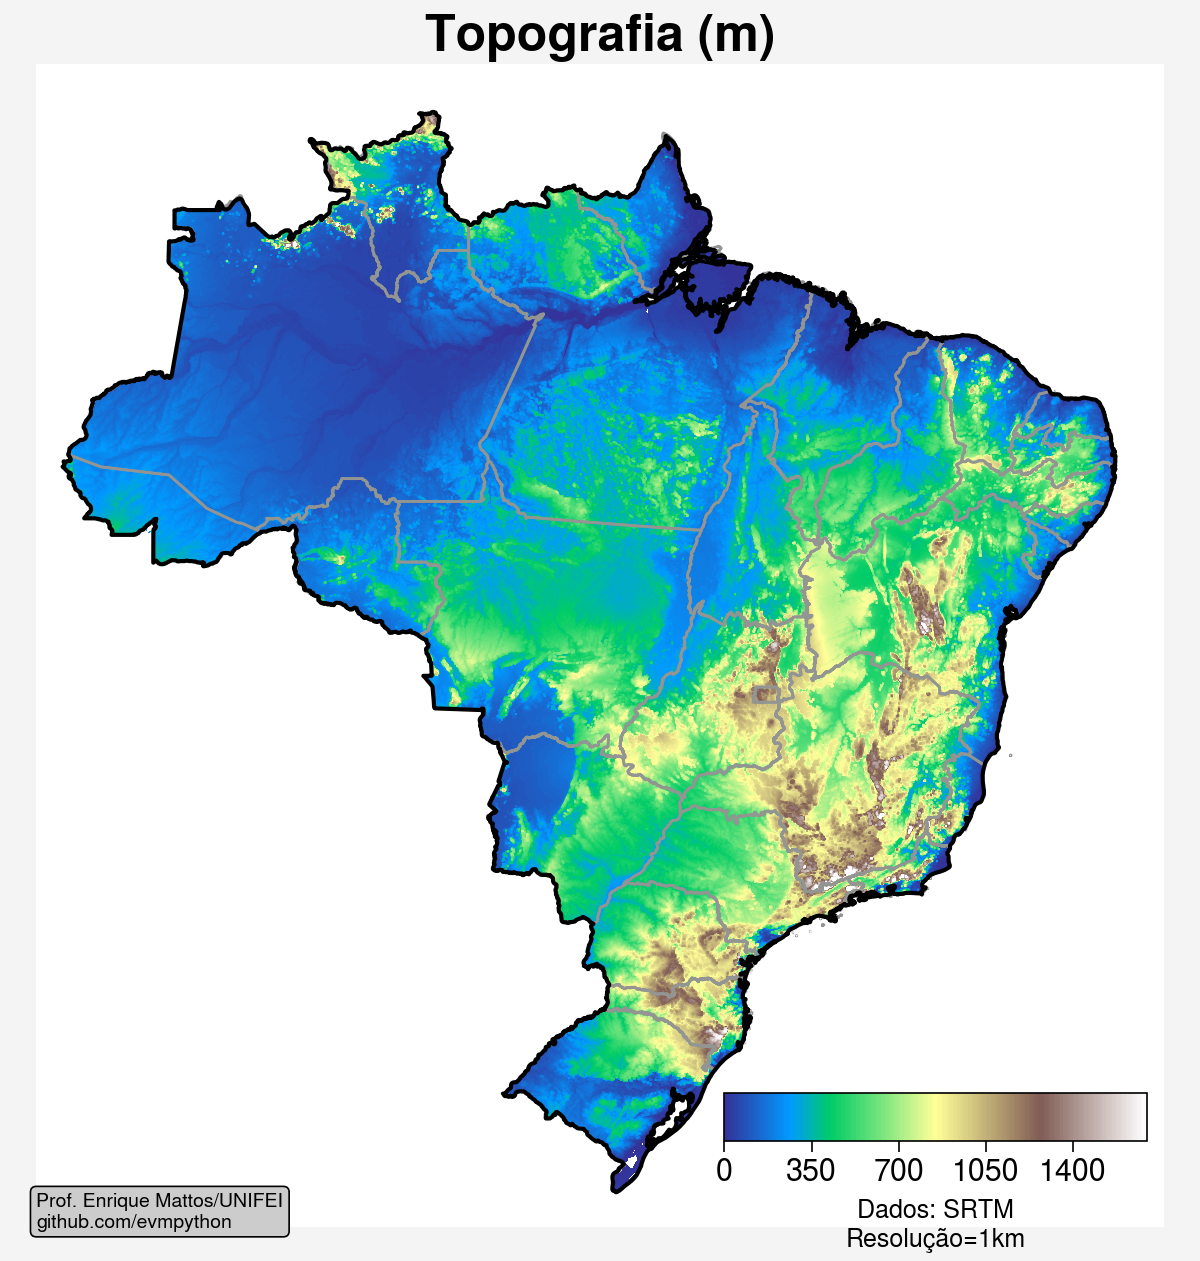

In [ ]:
%%time
#========================================================================================================================#
#                                           LIMITES DA REGIÃO
#========================================================================================================================#
lonmin, lonmax, latmin, latmax = -75.0, -33.0, -35.0, 7.0

#========================================================================================================================#
#                                           LEITURA DOS SHAPEFILES
#========================================================================================================================#
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')
contorno_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/brasil/BRAZIL.shp')

#========================================================================================================================#
#                                           LEITURA DO DADO DE RELEVO
#========================================================================================================================#
# fontes do dado de relevo: https://catalog.data.gov/dataset/srtm30-global-1-km-digital-elevation-model-dem-version-11-land-surface
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url).sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

#========================================================================================================================#
#                                           PLOTA FIGURA
#========================================================================================================================#
# cria a moldura da figura
fig, ax = pplt.subplots(axwidth=6, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title=f'Topografia (m)',
          titleloc='c',
          titleweight='bold',
          titlecolor='black',
          small='20px', large='25px',
          linewidth=0, grid=False)

# plota mapa
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'][:,:].salem.roi(shape=contorno_brasil),
                   cmap='terrain',
                   vmin=0, vmax=1700,
                   levels=pplt.arange(0, 1700, 10),
                   colorbar='best',
                   colorbar_kw={'label': 'Fonte: SRTM/Pixel: 1km',
                                'length': 24,
                                'frameon': False,
                                'ticklabelsize': 10,
                                'labelsize': 7,
                                'width': 2})

# plota contorno dos Estados
estados_brasil.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax)

# plota contorno do Brasil
contorno_brasil.plot(edgecolor='black', facecolor='none', linewidth=1.5, alpha=1, ax=ax)

# informação na figura
ax.annotate('Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', xy=(lonmin,latmin), fontsize=7, color='black')

# salva figura
fig.save(f'{dir}output/script_06_Fig_1_mapa_relevo_brasil.png', dpi=300)

#**PARTE 2:** Plota figura de relevo: `MG`

In [ ]:
# leitura do arquivo
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url)

# mostra os dados lidos
ds

<xarray.Dataset>
Dimensions:  (lat: 21600, lon: 43200)
Coordinates:
  * lat      (lat) float64 -90.0 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99 90.0
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    elev     (lat, lon) float32 ...
Attributes: (12/67)
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              srtm30plus_v11_land
    naming_authority:                org.pacioos
    metadata_link:                   http://pacioos.org/metadata/srtm30plus_v...
    ISO_Topic_Categories:            elevation
    title:                           SRTM30+ Global 1-km Digital Elevation Mo...
    ...                              ...
    publisher_type:                  institution
    license:                         David T. Sandwell, Walter H. F. Smith, a...
    acknowledgement:                 The Pacific Islands Ocean Observing Syst...
    cdm_data_type:                   Grid
    source:                          USGS SRTM30 DEM, USGS GTOPO30 DEM
    references:                      http://pacioos.org/metadata/world_srtm30...

CPU times: user 1min 3s, sys: 917 ms, total: 1min 4s
Wall time: 1min 23s


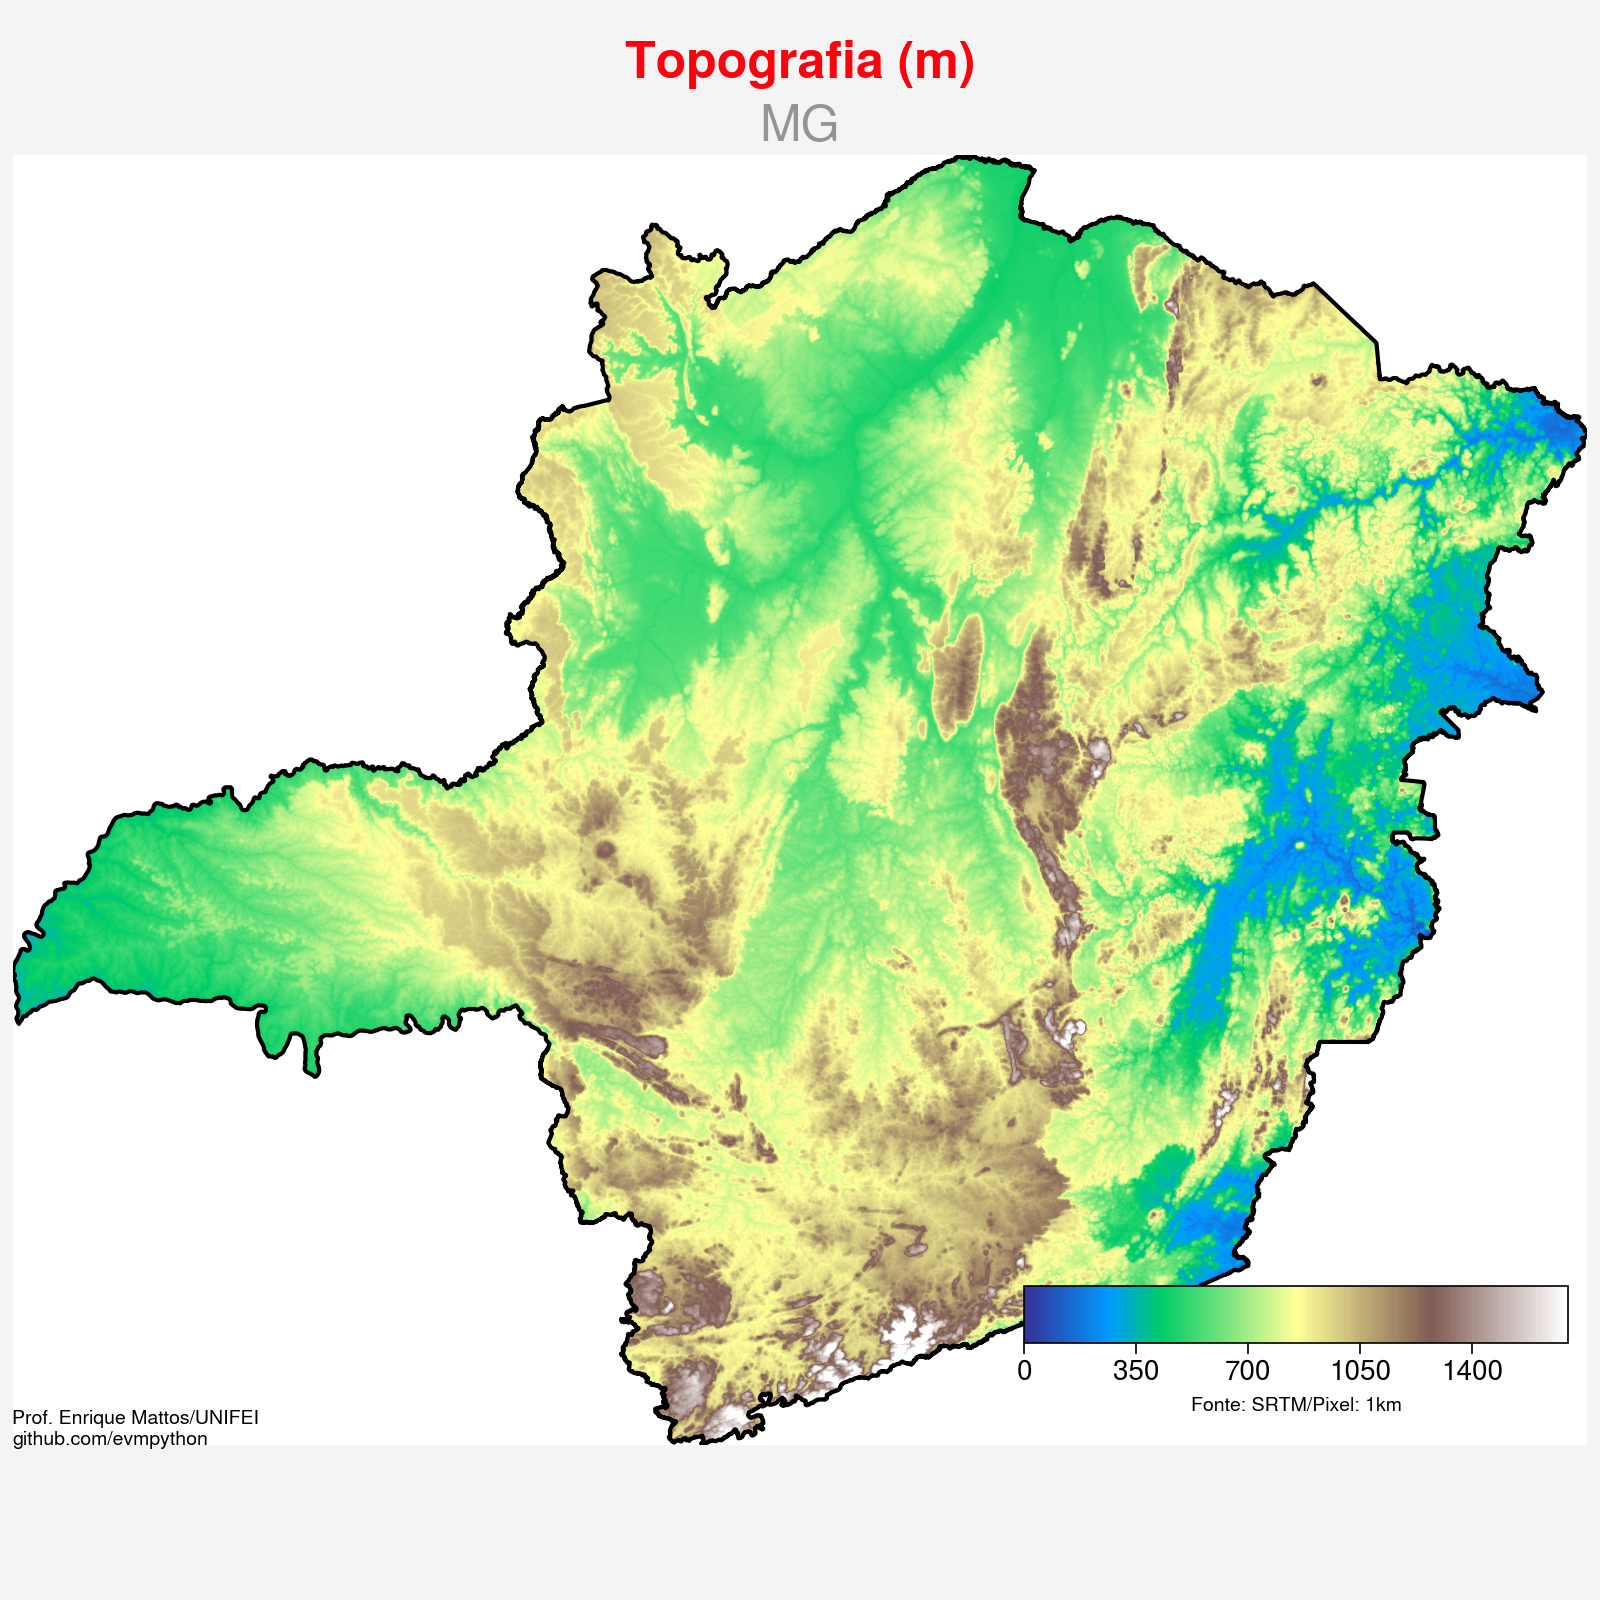

In [16]:
%%time
#========================================================================================================================#
#                                           DEFINE O ESTADO
#========================================================================================================================#
sigla_estado = 'MG'

#========================================================================================================================#
#                                           LEITURA DOS SHAPEFILES
#========================================================================================================================#
# lendo shapefile de todos Estados do Brasil
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp')

# selecionando o Estado
estado = estados_brasil.loc[ (estados_brasil['SIGLA_UF'] == sigla_estado) ]

#========================================================================================================================#
#                                           LIMITES DA REGIÃO
#========================================================================================================================#
lonmin, lonmax, latmin, latmax = float(estado['min_x']), float(estado['max_x']), float(estado['min_y']), float(estado['max_y'])

#========================================================================================================================#
#                                           LEITURA DO DADO DE RELEVO
#========================================================================================================================#
# fontes do dado de relevo: https://catalog.data.gov/dataset/srtm30-global-1-km-digital-elevation-model-dem-version-11-land-surface
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url).sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

#========================================================================================================================#
#                                           PLOTA FIGURA
#========================================================================================================================#
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(8,8), tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=False,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Topografia (m)',
          suptitlecolor='bright red',
          suptitleweight='bold',
          suptitlesize='large',
          title=f'{sigla_estado}',
          titlesize='med',
          titleloc='c',
          titleweight='normal',
          titlecolor='grey',
          small='20px', large='25px',
          linewidth=0, grid=False)

# plota mapa
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'][:,:].salem.roi(shape=estado),
                   cmap='terrain',
                   vmin=0, vmax=1700,
                   levels=pplt.arange(0, 1700, 10),
                   colorbar='lower right',
                   colorbar_kw={'label': 'Fonte: SRTM/Pixel: 1km',
                                'length': 20,
                                'frameon': False,
                                'ticklabelsize': 10,
                                'labelsize': 7,
                                'width': 2})

# plota contorno de Itajubá
estado.plot(edgecolor='black', facecolor='none', linewidth=1.5, alpha=1, ax=ax)

# informação na figura
ax.annotate('Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', xy=(lonmin,latmin), fontsize=7, color='black')

# salva figura
fig.save(f'{dir}output/script_06_Fig_2_mapa_relevo_{sigla_estado}.png', dpi=300, bbox_inches='tight')

#**PARTE 3:** Plota figura de relevo: `Itajubá`

In [4]:
# leitura do arquivo
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url)

# mostra os dados lidos
ds

<xarray.Dataset>
Dimensions:  (lat: 21600, lon: 43200)
Coordinates:
  * lat      (lat) float64 -90.0 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99 90.0
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    elev     (lat, lon) float32 ...
Attributes: (12/67)
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              srtm30plus_v11_land
    naming_authority:                org.pacioos
    metadata_link:                   http://pacioos.org/metadata/srtm30plus_v...
    ISO_Topic_Categories:            elevation
    title:                           SRTM30+ Global 1-km Digital Elevation Mo...
    ...                              ...
    publisher_type:                  institution
    license:                         David T. Sandwell, Walter H. F. Smith, a...
    acknowledgement:                 The Pacific Islands Ocean Observing Syst...
    cdm_data_type:                   Grid
    source:                          USGS SRTM30 DEM, USGS GTOPO30 DEM
    references:                      http://pacioos.org/metadata/world_srtm30...

CPU times: user 2.41 s, sys: 696 ms, total: 3.1 s
Wall time: 5.66 s


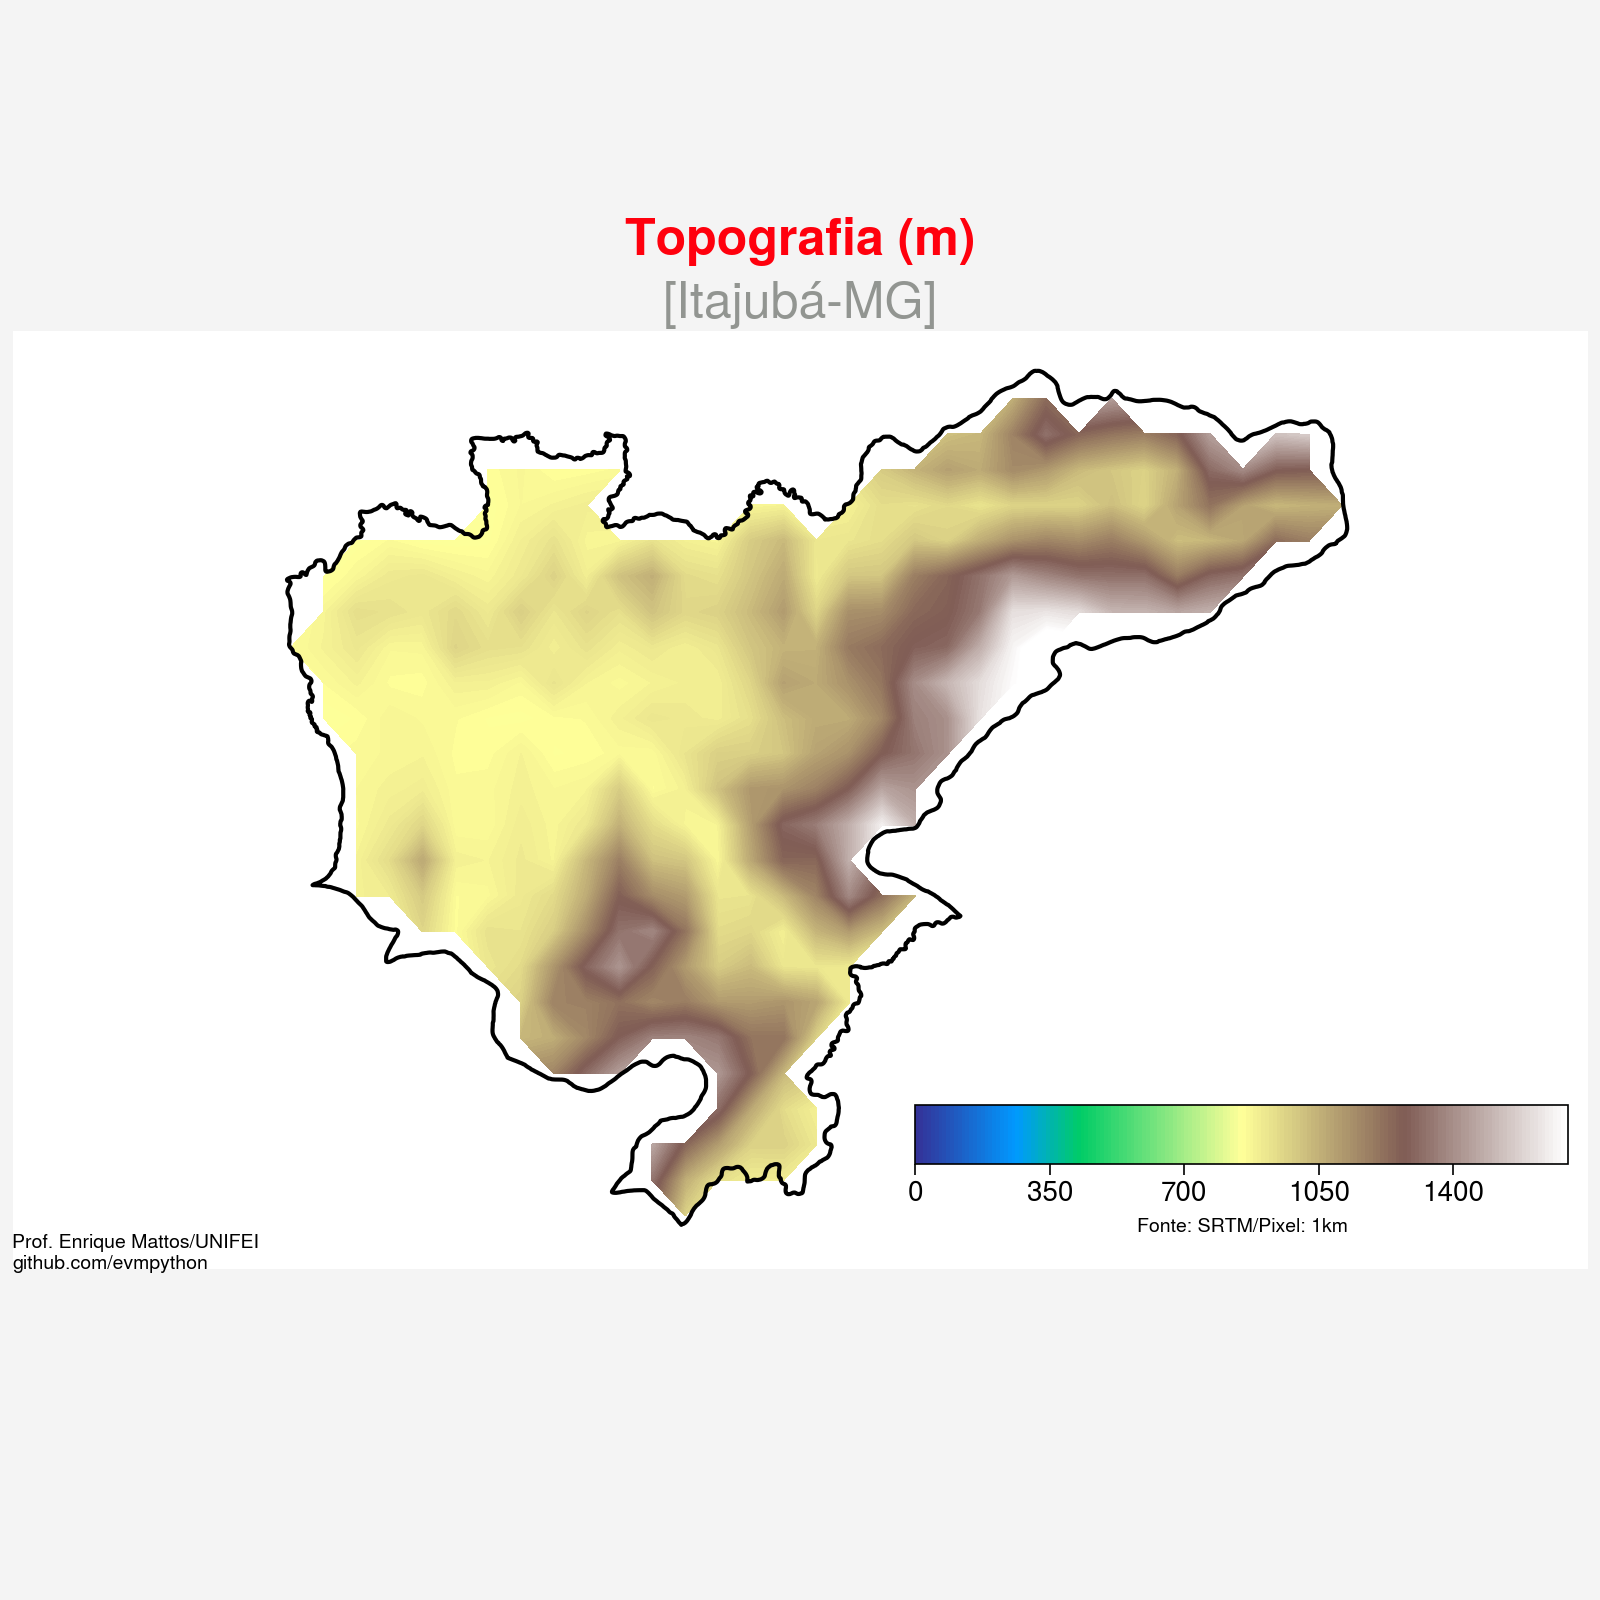

In [12]:
%%time
#========================================================================================================================#
#                                           LIMITES DA REGIÃO
#========================================================================================================================#
lonmin, lonmax, latmin, latmax = -45.6, -45.2, -22.55, -22.33

#========================================================================================================================#
#                                           LEITURA DOS SHAPEFILES
#========================================================================================================================#
itajuba = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/itajuba/itajuba.shp')

#========================================================================================================================#
#                                           LEITURA DO DADO DE RELEVO
#========================================================================================================================#
# fontes do dado de relevo: https://catalog.data.gov/dataset/srtm30-global-1-km-digital-elevation-model-dem-version-11-land-surface
url = 'https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land'
ds = xr.open_dataset(url).sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

#========================================================================================================================#
#                                           PLOTA FIGURA
#========================================================================================================================#
# cria a moldura da figura
fig, ax = pplt.subplots(figsize=(8,8), tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=False,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Topografia (m)',
          suptitlecolor='bright red',
          suptitleweight='bold',
          suptitlesize='large',
          title='[Itajubá-MG]',
          titlesize='med',
          titleloc='c',
          titleweight='normal',
          titlecolor='grey',
          small='20px', large='25px',
          linewidth=0, grid=False)

# plota mapa
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'][:,:].salem.roi(shape=itajuba),
                   cmap='terrain',
                   vmin=0, vmax=1700,
                   levels=pplt.arange(0, 1700, 10),
                   colorbar='best',
                   colorbar_kw={'label': 'Fonte: SRTM/Pixel: 1km',
                                'length': 24,
                                'frameon': False,
                                'ticklabelsize': 10,
                                'labelsize': 7,
                                'width': 2})

# plota contorno de Itajubá
itajuba.plot(edgecolor='black', facecolor='none', linewidth=1.5, alpha=1, ax=ax)

# informação na figura
ax.annotate('Prof. Enrique Mattos/UNIFEI\ngithub.com/evmpython', xy=(lonmin,latmin), fontsize=7, color='black')

# salva figura
fig.save(f'{dir}output/script_06_Fig_3_mapa_relevo_itajuba.png', dpi=300, bbox_inches='tight')